In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/haberman.csv')

In [ ]:
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [ ]:
df.columns = ['Age','Year','Nodes','Survival']

In [ ]:
df.head()

,Age,Year,Nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


**Agenda** : Given a patient with the some Age, Year of operation and number of Lymph nodes detected, we have to predict or conclude the chances whether the patient will live less than 5 years or more than 5 years.

In [ ]:
df.shape

(305, 4)

In [ ]:
df.isnull().sum()

Age         0
Year        0
Nodes       0
Survival    0
dtype: int64

In [ ]:
df.duplicated().value_counts()

False    288
True      17
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       305 non-null    int64
 1   Year      305 non-null    int64
 2   Nodes     305 non-null    int64
 3   Survival  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [ ]:
df.describe()

,Age,Year,Nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Survival - 0 (People living more than 5 years),
           1 (People living less than 5 years)

In [ ]:
df.Survival.replace([1,2],[0,1],inplace=True)

In [ ]:
df.describe()

,Age,Year,Nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,0.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,0.000000
75%,61.000000,66.000000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


Minimun Age = 30 & Max Age = 83, Operation Year = between 1958 to 1969, Nodes = [0,52],Survival = [0,1]
Nodes have higher count density between 0 and 4 (75 %).



# **Univariate Analysis**

In [ ]:
#Univariate Analysis

df.Survival.value_counts()

Survival
0    224
1     81
Name: count, dtype: int64

In [ ]:
df.Survival.value_counts(1)*100

Survival
0    73.442623
1    26.557377
Name: proportion, dtype: float64

There are only 27% people who will be living less than 5 years, which means the dataset is imbalanced.

<Axes: xlabel='Survival', ylabel='count'>

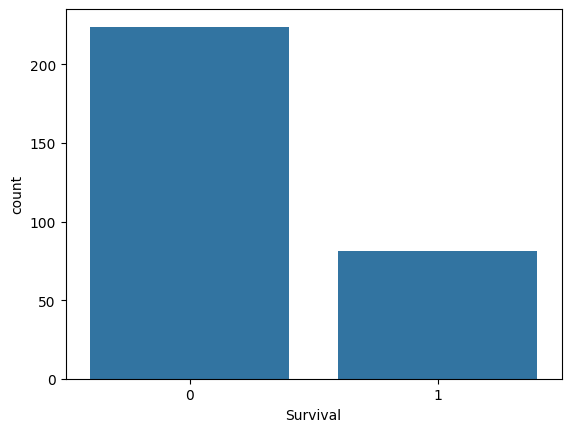

In [ ]:
sns.countplot(x='Survival', data = df)

**2. Age**

In [ ]:
df.Age.describe()

count    305.000000
mean      52.531148
std       10.744024
min       30.000000
25%       44.000000
50%       52.000000
75%       61.000000
max       83.000000
Name: Age, dtype: float64

0.15898611605406873


<Axes: xlabel='Age', ylabel='Count'>

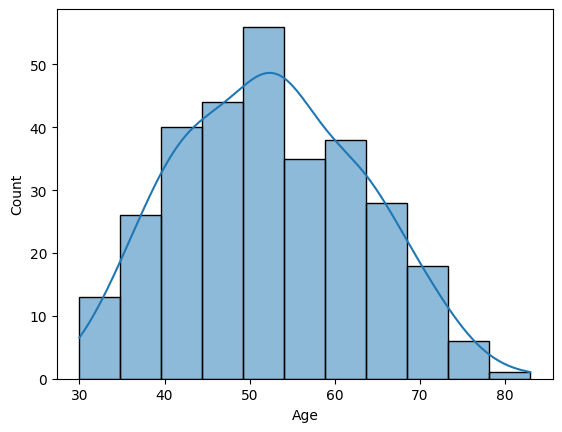

In [ ]:
print(df.Age.skew())
sns.histplot(x='Age', data=df, binwidth=5, kde=True)

*The maximum people who were operated where in the age group of 50 to 55.*

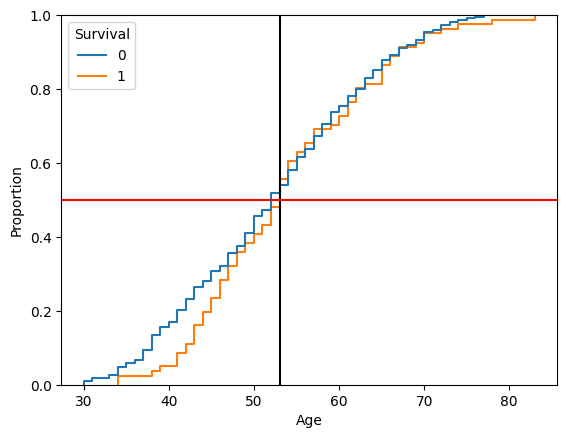

In [ ]:
sns.ecdfplot(x='Age', data=df, hue='Survival')
plt.axvline(53, c='black')
plt.axhline(0.5, c='red');



*   80% of people were below the age of 63.
*   50% of people were below the age of 53.



**3. Operation**

<Axes: xlabel='Year'>

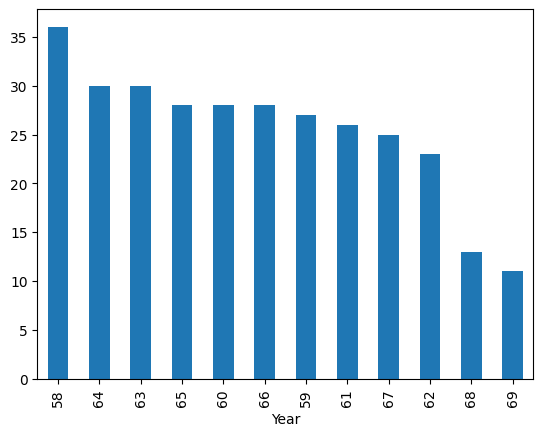

In [ ]:
df.Year.value_counts().plot(kind='bar')

**4. Lymph Nodes**

In [ ]:
df.Nodes.describe()

count    305.000000
mean       4.036066
std        7.199370
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: Nodes, dtype: float64

<Axes: xlabel='Nodes'>

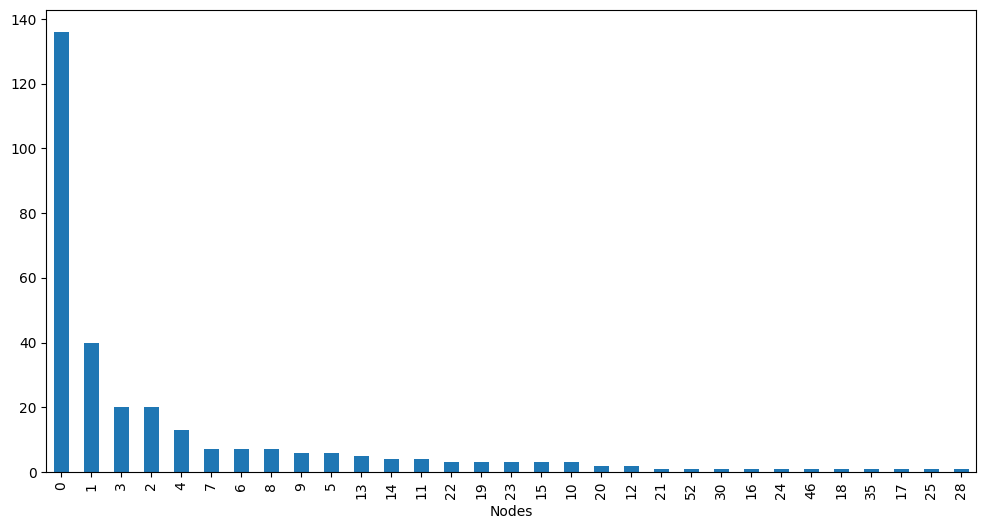

In [ ]:
plt.figure(figsize=(12,6))
df.Nodes.value_counts().plot(kind='bar')

<Axes: xlabel='Nodes', ylabel='Count'>

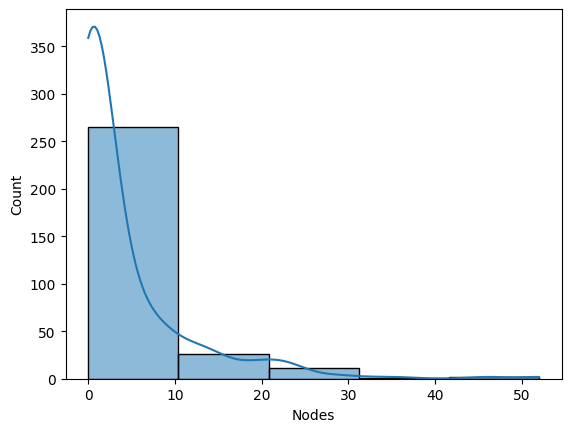

In [ ]:
df.Nodes.skew()
sns.histplot(x='Nodes',data= df, binwidth = 10, kde=True)

*Maximum density count for nodes is between 0 and 10.*

# **Bivariate Analysis**

In [ ]:
# Age -Survival
# Nodes - Survival
# Year - Survival
# Age - Nodes
# Year - Nodes
# Age - Years

<Axes: xlabel='Survival', ylabel='Age'>

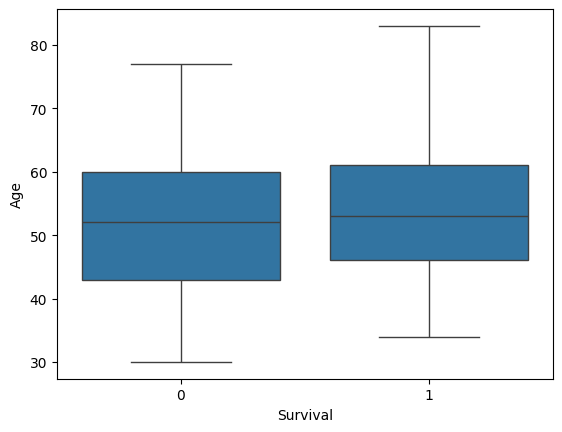

In [ ]:
sns.boxplot(x='Survival', y='Age', data = df)

People with age > 77 will live less than 5 years.
People with age < 35 will live more than 5 years.

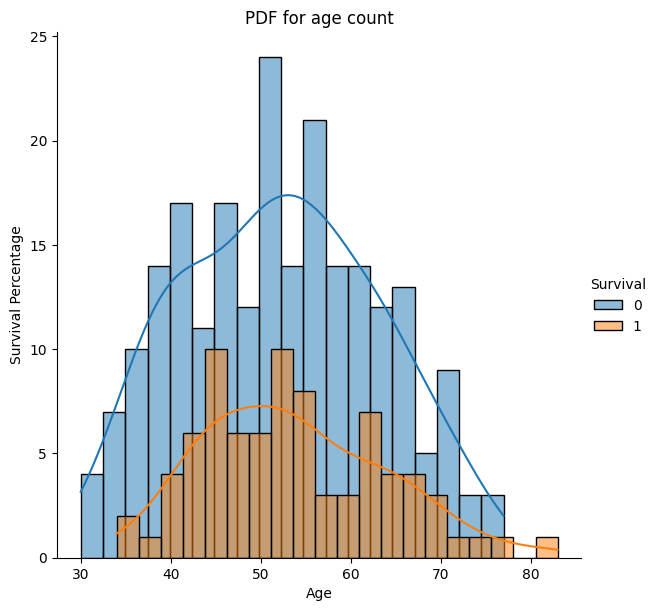

In [ ]:
sns.FacetGrid(df, hue='Survival', height=6).map( sns.histplot, 'Age', binwidth= 2.5, kde= True).add_legend()
plt.xlabel('Age')
plt.ylabel('Survival Percentage')
plt.title('PDF for age count')
plt.show()

*Maximum % of people living lesser than 5 years are between 45 to 55 age.*

In [ ]:
df.groupby('Age')['Survival'].sum().sort_values(ascending=False)

Age
53    6
46    4
43    4
65    4
54    4
52    4
47    3
61    3
45    3
44    3
48    3
41    3
57    3
62    3
50    2
49    2
56    2
51    2
55    2
42    2
66    2
67    2
70    2
34    2
60    2
69    1
72    1
74    1
63    1
78    1
83    1
59    1
39    1
38    1
36    0
33    0
77    0
76    0
75    0
35    0
73    0
71    0
58    0
37    0
68    0
40    0
31    0
64    0
30    0
Name: Survival, dtype: int64

In [ ]:
df.Age.value_counts().sort_values(ascending = False)

Age
52    14
54    13
50    12
57    11
53    11
47    11
43    11
65    10
38    10
49    10
41    10
55    10
42     9
45     9
61     9
63     8
59     8
70     7
46     7
48     7
44     7
34     7
62     7
56     7
58     7
37     6
51     6
60     6
39     6
67     6
66     5
64     5
72     4
69     4
40     3
31     2
33     2
35     2
36     2
73     2
68     2
30     2
74     2
71     1
75     1
76     1
77     1
78     1
83     1
Name: count, dtype: int64

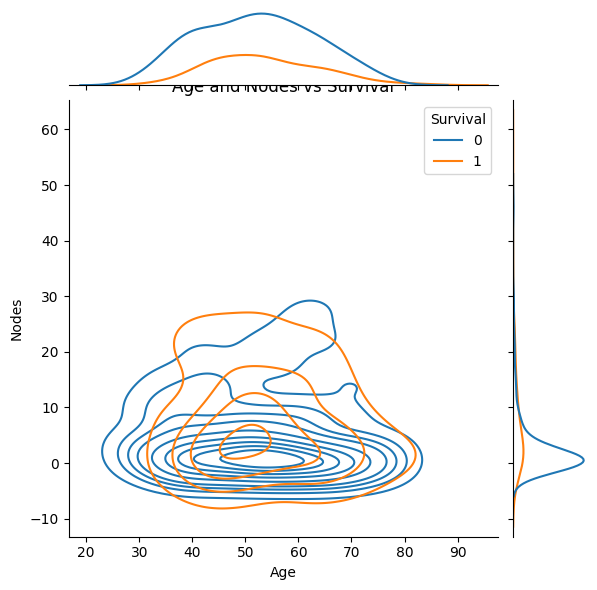

In [ ]:
sns.jointplot(x='Age',y='Nodes',data=df, hue='Survival',kind='kde')
plt.title('Age and Nodes vs Survival')
plt.show()

*Maximum % of people lining lesser than 5 years are between 43 to 53.
People between 30-33 years old are living more than 5 years.
People with age>77 will actually live lesser than 5 years.*

<Axes: xlabel='Survival', ylabel='Nodes'>

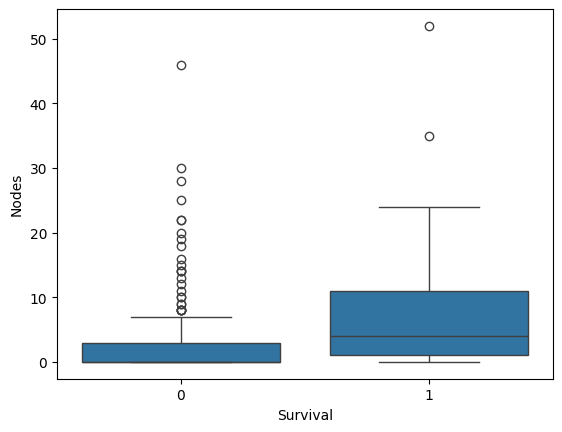

In [ ]:
sns.boxplot(y='Nodes',x='Survival', data=df)

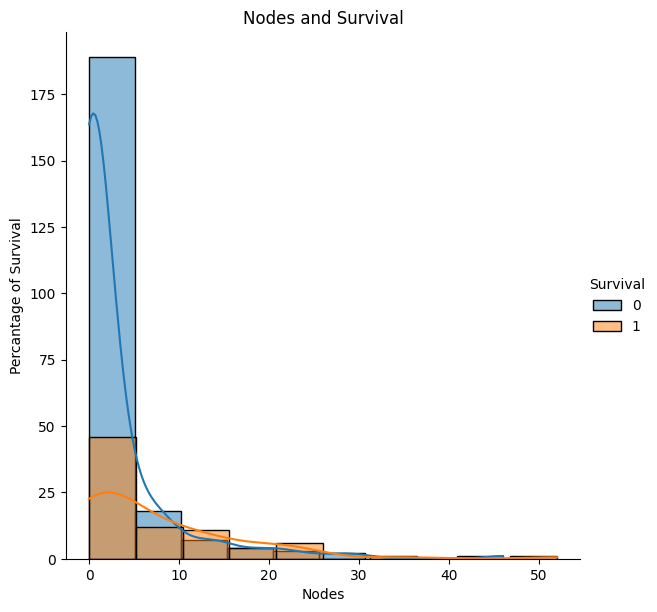

In [ ]:
sns.FacetGrid(df, hue='Survival', height = 6).map(sns.histplot, 'Nodes', binwidth=5, kde=True).add_legend()
plt.xlabel('Nodes')
plt.ylabel('Percantage of Survival')
plt.title('Nodes and Survival')
plt.show()

In [ ]:
df.groupby('Nodes')['Survival'].sum().sort_values(ascending=False)

Nodes
0     19
1      8
3      7
2      5
13     4
5      4
9      4
4      3
6      3
23     3
11     3
19     2
15     2
7      2
8      2
12     1
21     1
35     1
24     1
14     1
22     1
20     1
17     1
10     1
52     1
18     0
16     0
25     0
28     0
30     0
46     0
Name: Survival, dtype: int64

In [ ]:
df.Nodes.value_counts().sort_values(ascending=False)

Nodes
0     136
1      40
3      20
2      20
4      13
7       7
6       7
8       7
9       6
5       6
13      5
14      4
11      4
10      3
15      3
23      3
19      3
22      3
20      2
12      2
21      1
52      1
30      1
16      1
24      1
46      1
18      1
35      1
17      1
25      1
28      1
Name: count, dtype: int64

In [ ]:
4/5

0.8

0. - 13%
1. - 20%
2. - 25%
3. - 35%
4. - 23%
5. - 66%
6. - 42%
7. - 28%
8. - 28%
9. - 66%
10. - 33%


13. - 80%
23. - 100%


Year vs Survival

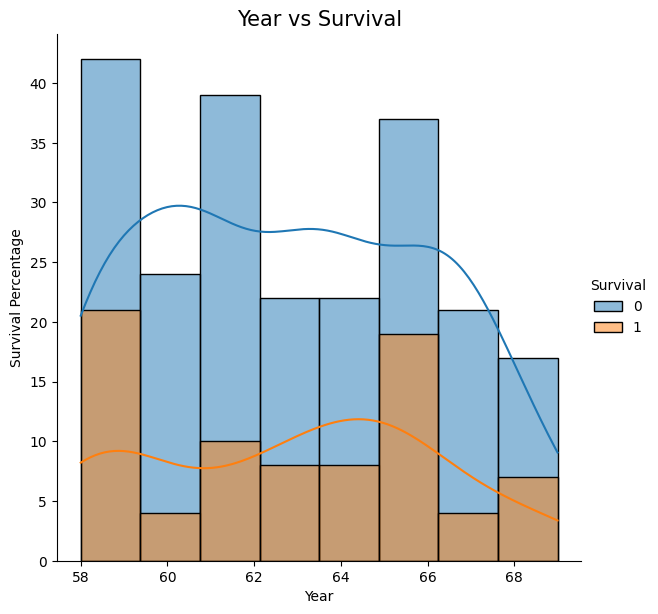

In [ ]:
sns.FacetGrid(df,hue='Survival', height=6).map(sns.histplot,'Year',bins=8,kde=True).add_legend()
plt.xlabel('Year')
plt.ylabel('Survival Percentage')
plt.title('Year vs Survival', size=15)
plt.show()

In [ ]:
df.groupby('Survival')['Year'].value_counts().unstack()

Year,58,59,60,61,62,63,64,65,66,67,68,69
Survival,,,,,,,,,,,,
0,24,18,24,23,16,22,22,15,22,21,10,7
1,12,9,4,3,7,8,8,13,6,4,3,4


In [ ]:
4/11


0.36363636363636365

1958 - 33% & 1965 - 46% & 1969 - 36%  People died under the age of 5 years.

<Figure size 1200x600 with 0 Axes>

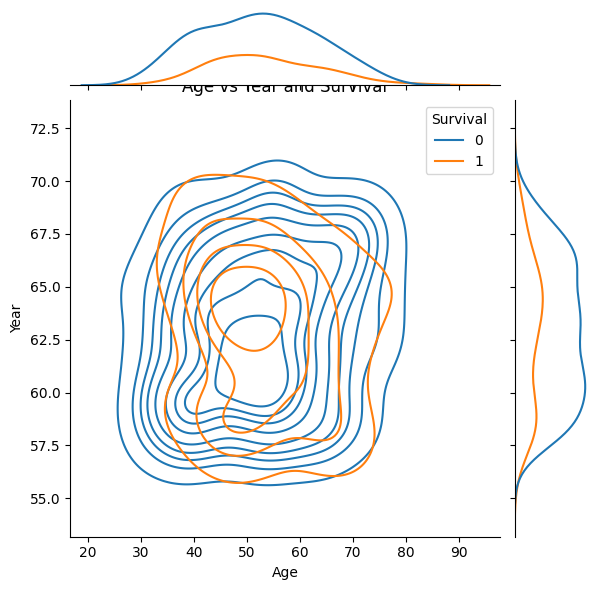

In [ ]:
plt.figure(figsize= (12,6))
sns.jointplot(x='Age', y='Year', data=df, hue='Survival', kind='kde')
plt.title('Age vs Year and Survival')
plt.show()


# **Multivariate  Analysis**

<Axes: >

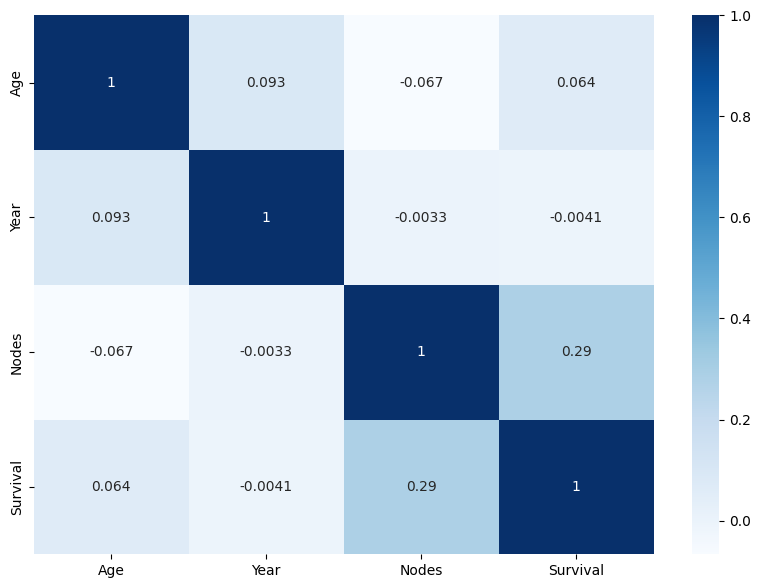

In [ ]:
plt.figure(figsize=(10,7))
corr=df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='Blues', annot=True)